In [ ]:
import pandas as pd
from ipywidgets import interact, widgets

# Read the relevances_rendered_class.csv file into a DataFrame
df_revl = pd.read_csv('/content/relevances_rendered_class.csv')
df_revl.set_index("Patient ID", inplace=True)

# Initialize a dictionary to store a DataFrame for each patient
patient_dfs = {}

# Function to store selected patient data in separate DataFrames
def store_filtered_data(patient_id):
    selected_data = df_revl.loc[patient_id]
    filtered_data = selected_data[(selected_data >= 0.0003190452) & (selected_data <= 0.0009207357)]

    # Store filtered data in a new DataFrame and add it to the dictionary
    temp_df = pd.DataFrame(filtered_data).transpose()
    temp_df['Patient ID'] = patient_id  # Add Patient ID as a column

    # Store this DataFrame in the dictionary
    patient_dfs[patient_id] = temp_df

    display(temp_df)  # Optionally display the filtered data

# Create a dropdown menu with patient IDs
patient_dropdown = widgets.Dropdown(
    options=df_revl.index,
    description='Patient ID:',
    disabled=False,
)

# Define the interaction between the dropdown and the function
interact(store_filtered_data, patient_id=patient_dropdown);


interactive(children=(Dropdown(description='Patient ID:', options=('GSM615233', 'GSM519226', 'GSM411347', 'GSM…

In [ ]:
# Read the GEO_HG_PPI.csv file
geo_hg_ppi = pd.read_csv('/content/GEO_HG_PPI.csv')
geo_hg_ppi.set_index("probe", inplace=True)

def add_gene_expression_values():
    for patient_id, df in patient_dfs.items():
        # Iterate over the original gene columns (excluding 'Patient ID')
        for gene in df.columns[:-1]:
            # Check if the gene is present in the GEO_HG_PPI index
            if gene in geo_hg_ppi.index and patient_id in geo_hg_ppi.columns:
                # Get the gene expression value
                expression_value = geo_hg_ppi.loc[gene, patient_id]
                # Add a new column for the gene expression value with a suffix '_expr'
                df[f'{gene}_expr'] = expression_value
            else:
                # If the gene or patient ID is not found, set the expression value to None
                df[f'{gene}_expr'] = None

# Call this function after you're done with patient selections
# add_gene_expression_values()


In [ ]:
add_gene_expression_values()

In [ ]:
patient_dfs

{'GSM615233':               RPL41    EEF1A1      TPT1    RPL23A       UBC      RPS2  \
 GSM615233  0.000492  0.000832  0.000442  0.000357  0.000571  0.000411   
 
                ACTB     HUWE1     RPS4X     RPS10  ...   WAS_expr  FHL1_expr  \
 GSM615233  0.000704  0.000441  0.000452  0.000425  ...  10.159464   12.03606   
 
            SMAD2_expr  CAV1_expr  GIT1_expr  PRKAR2B_expr   LPL_expr  \
 GSM615233    8.871896  11.500998   9.994672     11.140808  11.858803   
 
            PTN_expr  PLIN1_expr  CD36_expr  
 GSM615233  9.878614    12.24536  10.923634  
 
 [1 rows x 249 columns]}

In [ ]:
df_combined = pd.DataFrame()

def generate_combined_df(patient_id):
    global df_combined
    df = patient_dfs[patient_id]  # Retrieve the DataFrame for the selected patient

    # Split columns into ranking and expression
    ranking_columns = [col for col in df.columns if '_expr' not in col and col != 'Patient ID']
    expression_columns = [col.replace('_expr', '') for col in df.columns if '_expr' in col]

    # Create DataFrame for ranking data
    df_ranking = df[ranking_columns].transpose()
    df_ranking.reset_index(inplace=True)
    df_ranking.columns = ['Gene', 'Ranking']

    # Create DataFrame for expression data
    df_expression = df[[col for col in df.columns if '_expr' in col]].transpose()
    df_expression.reset_index(inplace=True)
    df_expression.columns = ['Gene_expr', 'Gene Expression']
    df_expression['Gene'] = df_expression['Gene_expr'].str.replace('_expr', '')  # Remove '_expr' suffix to match gene names
    df_expression.drop('Gene_expr', axis=1, inplace=True)

    # Merge ranking and expression data on gene names
    df_combined = pd.merge(df_ranking, df_expression, on='Gene', how='inner')

    # Display the combined DataFrame
    display(df_combined)

    return df_combined  # Return the DataFrame for further use


from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown menu with patient IDs from patient_dfs keys
patient_id_dropdown = widgets.Dropdown(
    options=list(patient_dfs.keys()),
    description='Patient ID:',
    disabled=False,
)



# Link the dropdown to the function
interactive_df_display = interactive(generate_combined_df, patient_id=patient_id_dropdown)

# Display the interactive widget
display(interactive_df_display)


interactive(children=(Dropdown(description='Patient ID:', options=('GSM615233',), value='GSM615233'), Output()…

In [ ]:
df_combined

,Gene,Ranking,Gene Expression
0,RPL41,0.000492,13.431648
1,EEF1A1,0.000832,13.563829
2,TPT1,0.000442,13.459339
3,RPL23A,0.000357,13.195257
4,UBC,0.000571,13.061771
...,...,...,...
119,PRKAR2B,0.000342,11.140808
120,LPL,0.000437,11.858803
121,PTN,0.000353,9.878614
122,PLIN1,0.000334,12.245360


In [ ]:
# Sort the DataFrame by the "Ranking" column
df_sorted = df_combined.sort_values(by='Ranking',ascending=False)

# If you want to sort in descending order, add the parameter ascending=False
# df_sorted = df_combined.sort_values(by='Ranking', ascending=False)

# Print the sorted DataFrame
print(df_sorted)
df_combined = df_sorted

       Gene   Ranking  Gene Expression
1    EEF1A1  0.000832        13.563829
50      VIM  0.000740        12.881567
6      ACTB  0.000704        12.979887
18      UBB  0.000687        13.224023
4       UBC  0.000571        13.061771
..      ...       ...              ...
80   LGALS3  0.000322        12.069770
116   SMAD2  0.000322         8.871896
109    RAC2  0.000322        10.567212
56    EEF1D  0.000320        11.079932
81    PFDN5  0.000319        11.546335

[124 rows x 3 columns]


In [ ]:
!pip install gseapy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.3 MB/s eta 0:00:00


In [ ]:
genes = df_combined['Gene'].tolist()
expressions = df_combined['Gene Expression'].tolist()  # or use 'Ranking' if more appropriate


In [ ]:
import gseapy as gp

# Define gene sets
gene_sets = 'KEGG_2016'  # Example gene set, choose based on your study

# Run GSEA
# You might want to adjust parameters like 'min_size', 'max_size', and 'out_dir' based on your needs
enr = gp.enrichr(gene_list=genes,
                 gene_sets=gene_sets,
                 outdir='/content/gsea_report',
                 cutoff=0.05)  # Adjust the cutoff as needed

# View the results
enr.results.head()


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2016,Ribosome Homo sapiens hsa03010,25/137,4.664206e-30,7.975793e-28,0,0,44.561688,3009.591043,RPL30;RPL3;RPL31;RPL12;RPLP1;RPL11;RPL8;RPL9;R...
1,KEGG_2016,Viral carcinogenesis Homo sapiens hsa05203,14/205,3.657875e-11,3.127483e-09,0,0,13.117087,315.223983,YWHAE;GSN;YWHAB;STAT3;HLA-B;HLA-C;HLA-A;YWHAZ;...
2,KEGG_2016,Pathogenic Escherichia coli infection Homo sap...,8/55,1.657848e-09,9.449732e-08,0,0,29.096112,588.257780,ITGB1;TUBA1B;YWHAQ;TUBB;WAS;YWHAZ;ACTB;RHOA
3,KEGG_2016,Antigen processing and presentation Homo sapie...,8/77,2.557512e-08,1.093336e-06,0,0,19.797101,346.085916,HSP90AA1;HSP90AB1;CANX;HLA-B;HLA-C;HLA-A;B2M;CTSB
4,KEGG_2016,Phagosome Homo sapiens hsa04145,10/154,4.205388e-08,1.364704e-06,0,0,12.019981,204.151124,ITGB1;TUBA1B;TUBB;CANX;HLA-B;HLA-C;HLA-A;CD36;...


In [ ]:
enr.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2016,Ribosome Homo sapiens hsa03010,26/137,6.330803e-32,1.038252e-29,0,0,48.230293,3464.733815,RPL30;RPL3;RPL31;RPL12;RPLP1;RPL8;RPL9;RPL6;RP...
1,KEGG_2016,Viral carcinogenesis Homo sapiens hsa05203,15/205,2.033299e-12,1.667306e-10,0,0,14.526316,391.068196,YWHAE;JUN;YWHAB;STAT3;HLA-B;HLA-C;HLA-A;PIK3R1...
2,KEGG_2016,Epstein-Barr virus infection Homo sapiens hsa0...,14/202,2.401528e-11,1.312835e-09,0,0,13.576635,331.980373,YWHAE;JUN;YWHAB;STAT3;HLA-B;HLA-C;HSPB1;HLA-A;...
3,KEGG_2016,Antigen processing and presentation Homo sapie...,10/77,3.812788e-11,1.563243e-09,0,0,26.400586,633.352057,HSP90AA1;HSP90AB1;HSPA5;CANX;HLA-B;HLA-C;HLA-A...
4,KEGG_2016,AGE-RAGE signaling pathway in diabetic complic...,10/101,5.907677e-10,1.937718e-08,0,0,19.414246,412.544938,COL1A1;JUN;COL3A1;COL1A2;STAT1;MMP2;STAT3;FN1;...
...,...,...,...,...,...,...,...,...,...,...
159,KEGG_2016,Dopaminergic synapse Homo sapiens hsa04728,1/129,5.469953e-01,5.606701e-01,0,0,1.275181,0.769336,ATF4
160,KEGG_2016,Parkinson's disease Homo sapiens hsa05012,1/142,5.818594e-01,5.927015e-01,0,0,1.156849,0.626464,UBB
161,KEGG_2016,Transcriptional misregulation in cancer Homo s...,1/180,6.692305e-01,6.774926e-01,0,0,0.909506,0.365282,CEBPB
162,KEGG_2016,Huntington's disease Homo sapiens hsa05016,1/193,6.947503e-01,6.990125e-01,0,0,0.847366,0.308613,CLTC


In [ ]:
enr.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2016,Ribosome Homo sapiens hsa03010,25/137,4.664206e-30,7.975793e-28,0,0,44.561688,3009.591043,RPL30;RPL3;RPL31;RPL12;RPLP1;RPL11;RPL8;RPL9;R...
1,KEGG_2016,Viral carcinogenesis Homo sapiens hsa05203,14/205,3.657875e-11,3.127483e-09,0,0,13.117087,315.223983,YWHAE;GSN;YWHAB;STAT3;HLA-B;HLA-C;HLA-A;YWHAZ;...
2,KEGG_2016,Pathogenic Escherichia coli infection Homo sap...,8/55,1.657848e-09,9.449732e-08,0,0,29.096112,588.257780,ITGB1;TUBA1B;YWHAQ;TUBB;WAS;YWHAZ;ACTB;RHOA
3,KEGG_2016,Antigen processing and presentation Homo sapie...,8/77,2.557512e-08,1.093336e-06,0,0,19.797101,346.085916,HSP90AA1;HSP90AB1;CANX;HLA-B;HLA-C;HLA-A;B2M;CTSB
4,KEGG_2016,Phagosome Homo sapiens hsa04145,10/154,4.205388e-08,1.364704e-06,0,0,12.019981,204.151124,ITGB1;TUBA1B;TUBB;CANX;HLA-B;HLA-C;HLA-A;CD36;...
...,...,...,...,...,...,...,...,...,...,...
166,KEGG_2016,Alcoholism Homo sapiens hsa05034,1/179,6.731491e-01,6.872509e-01,0,0,0.899699,0.356090,ATF4
167,KEGG_2016,Transcriptional misregulation in cancer Homo s...,1/180,6.751939e-01,6.872509e-01,0,0,0.894627,0.351370,CEBPB
168,KEGG_2016,Huntington's disease Homo sapiens hsa05016,1/193,7.006491e-01,7.089408e-01,0,0,0.833503,0.296517,CLTC
169,KEGG_2016,Cytokine-cytokine receptor interaction Homo sa...,1/265,8.096931e-01,8.144560e-01,0,0,0.603966,0.127497,EPOR


In [ ]:
genes_to_filter = ["RPL30", "RPL3", "RPL31", "RPL12", "RPLP1", "RPL11", "RPL8", "RPL9", "RPL6", "RPS15",
                   "RPS4X", "RPS14", "RPS15A", "RPS19", "RPS3", "RPL38", "RPS2", "RPS27A", "RPS10",
                   "RPL41", "RPL22", "RPS6", "RPL23A", "RPL29", "UBA52"]

metastatic = df_combined[(df_combined['Gene'].isin(genes_to_filter)) & pd.notnull(df_combined['Gene Expression'])]


In [ ]:
metastatic

,Gene,Ranking,Gene Expression
0,RPL41,0.000492,13.431648
6,RPL23A,0.000357,13.195257
10,RPS2,0.000411,13.029795
16,RPS4X,0.000452,12.849564
18,RPS10,0.000425,12.989799
26,RPS15A,0.000332,12.865515
28,RPLP1,0.000395,12.671026
30,RPS15,0.000336,12.393316
34,RPL31,0.000429,12.90684
38,RPS14,0.000349,12.419793


In [ ]:
genes_to_filter = ["RPL30", "RPL3", "RPL31", "RPL12", "RPLP1", "RPL11", "RPL8", "RPL9", "RPL6", "RPS15",
                   "RPS4X", "RPS14", "RPS15A", "RPS19", "RPS3", "RPL38", "RPS2", "RPS27A", "RPS10",
                   "RPL41", "RPL22", "RPS6", "RPL23A", "RPL29", "UBA52"]

non_metastatic = df_combined[(df_combined['Gene'].isin(genes_to_filter)) & pd.notnull(df_combined['Gene Expression'])]

In [ ]:
non_metastatic

,Gene,Ranking,Gene Expression
0,RPL41,0.000530,13.892742
3,RPL23A,0.000377,13.615073
5,RPS2,0.000417,13.361660
8,RPS4X,0.000458,12.979887
9,RPS10,0.000433,13.303665
14,RPS15A,0.000334,13.019293
15,RPLP1,0.000377,12.628617
16,RPS15,0.000338,12.573794
18,RPL31,0.000405,12.841417
20,RPS14,0.000337,12.499761


In [ ]:
import pandas as pd

# Assuming 'non_metastatic' and 'metastatic' are the DataFrames

# Concatenate the two DataFrames
concatenated_df = pd.concat([non_metastatic['Gene'], metastatic['Gene']])

# Drop duplicates to keep only unique genes
different_genes = concatenated_df.drop_duplicates(keep=False)

# Display the different genes
print(different_genes)


94    RPL11
Name: Gene, dtype: object


In [ ]:
import plotly.express as px

# Assuming 'merged_df' is the merged DataFrame from the previous code snippet
# Merge the two DataFrames on the 'Gene' column
merged_df = pd.merge(metastatic, non_metastatic, on='Gene', suffixes=('_metastatic', '_non_metastatic'))

import plotly.express as px

# Convert 'Gene Expression' columns to numeric
merged_df['Gene Expression_metastatic'] = pd.to_numeric(merged_df['Gene Expression_metastatic'], errors='coerce')
merged_df['Gene Expression_non_metastatic'] = pd.to_numeric(merged_df['Gene Expression_non_metastatic'], errors='coerce')

# Create an interactive grouped bar plot
fig = px.bar(merged_df, x='Gene', y=['Gene Expression_metastatic', 'Gene Expression_non_metastatic'],
             title='Gene Expression by Gene and Metastatic Status',
             labels={'value': 'Gene Expression', 'variable': 'Status'}, barmode='group')

# Set y-axis range to start from 10
fig.update_yaxes(range=[11, max(merged_df['Gene Expression_metastatic'].max(), merged_df['Gene Expression_non_metastatic'].max())])

# Show the plot
fig.show()


In [ ]:
merged_df

,Gene,Ranking_metastatic,Gene Expression_metastatic,Ranking_non_metastatic,Gene Expression_non_metastatic
0,RPL41,0.000492,13.431648,0.000530,13.892742
1,RPL23A,0.000357,13.195257,0.000377,13.615073
2,RPS2,0.000411,13.029795,0.000417,13.361660
3,RPS4X,0.000452,12.849564,0.000458,12.979887
4,RPS10,0.000425,12.989799,0.000433,13.303665
5,RPS15A,0.000332,12.865515,0.000334,13.019293
6,RPLP1,0.000395,12.671026,0.000377,12.628617
7,RPS15,0.000336,12.393316,0.000338,12.573794
8,RPL31,0.000429,12.906840,0.000405,12.841417
9,RPS14,0.000349,12.419793,0.000337,12.499761


In [ ]:
import pandas as pd

# Assuming 'merged_df' is the merged DataFrame from before

# Calculate the difference between 'Gene Expression_metastatic' and 'Gene Expression_non_metastatic'
merged_df['Expression Difference'] = merged_df['Gene Expression_metastatic'] - merged_df['Gene Expression_non_metastatic']

# Create a new DataFrame with 'Gene' and 'Expression Difference' columns
new_df = merged_df[['Gene', 'Expression Difference']].copy()

# Display the new DataFrame
print(new_df)


      Gene  Expression Difference
0    RPL41              -0.461094
1   RPL23A              -0.419817
2     RPS2              -0.331865
3    RPS4X              -0.130323
4    RPS10              -0.313865
5   RPS15A              -0.153778
6    RPLP1               0.042409
7    RPS15              -0.180478
8    RPL31               0.065422
9    RPS14              -0.079967
10   RPL30              -0.040439
11    RPS6               0.035562
12   RPS19              -0.444109
13   RPL12              -0.190336
14    RPL3              -0.271953
15    RPL9               0.260822
16   RPL38               0.270879
17    RPS3              -0.053718
18    RPL8               0.012819
19   RPL22              -0.330023
20   RPL29               0.155327
21  RPS27A               0.018023
22    RPL6               0.000000
23   UBA52               0.942591


In [ ]:
import plotly.express as px

# Calculate the absolute value of 'Expression Difference'
new_df['Expression Difference'] = new_df['Expression Difference'].abs()

# Filter the DataFrame where the absolute value of 'Expression Difference' is greater than 0.4
filtered_df = new_df[new_df['Expression Difference'] > 0.4]

# Create a bar plot
fig = px.bar(filtered_df, x='Gene', y='Expression Difference',
             title='Genes with Absolute Expression Difference > 0.4',
             labels={'Expression Difference': 'Expression Difference'})

# Show the plot
fig.show()


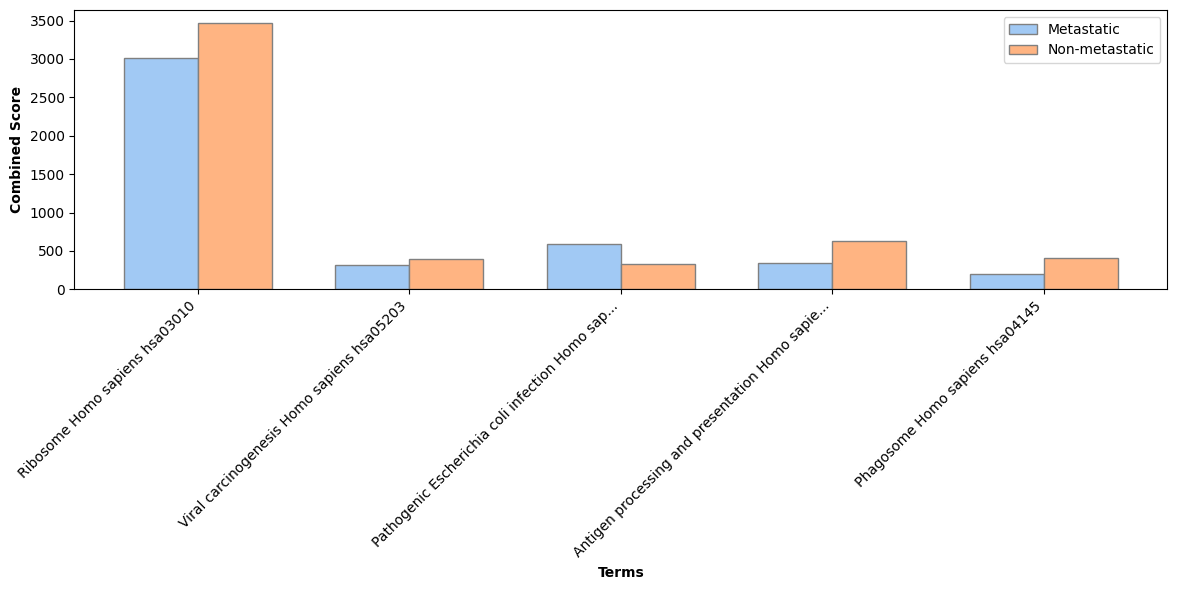

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
colors = sns.color_palette("pastel")

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of bars
bar_width = 0.35

# Set position of bar on X axis
r1 = range(len(metastatic_terms))
r2 = [x + bar_width for x in r1]

# Plot bars
ax.bar(r1, metastatic_scores, color=colors[0], width=bar_width, edgecolor='grey', label='Metastatic')
ax.bar(r2, non_metastatic_scores, color=colors[1], width=bar_width, edgecolor='grey', label='Non-metastatic')

# Add xticks on the middle of the group bars
ax.set_xlabel('Terms', fontweight='bold')
ax.set_ylabel('Combined Score', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in range(len(metastatic_terms))])
ax.set_xticklabels(metastatic_terms, rotation=45, ha='right')

# Create legend & Show graphic
plt.legend()
plt.tight_layout()  # Adjust plot to prevent clipping of labels
plt.show()


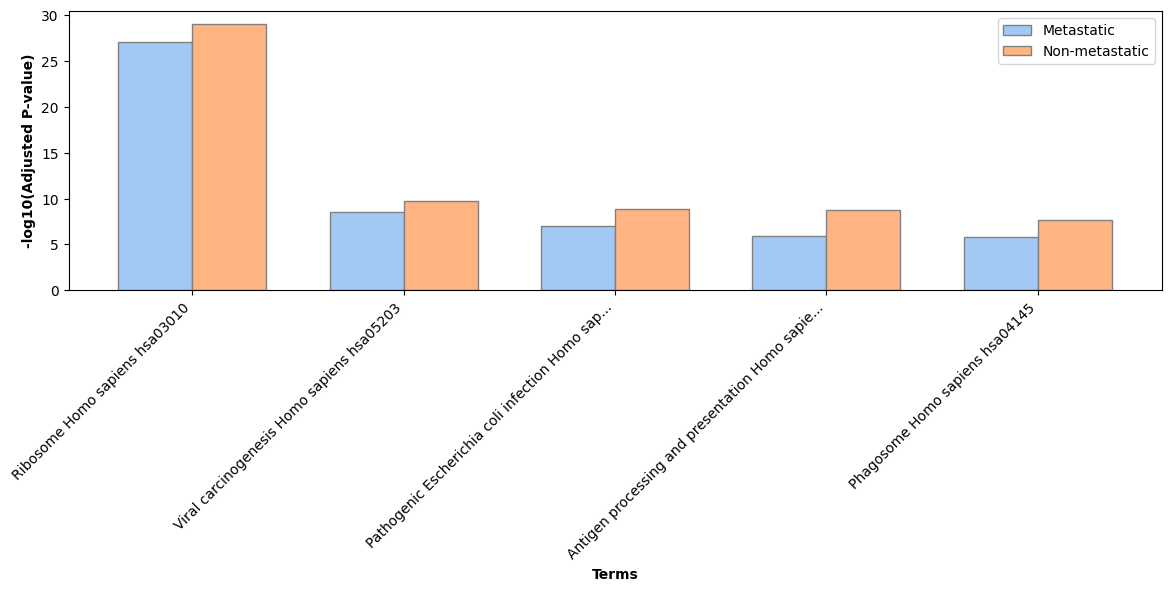

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for metastatic group
metastatic_terms = [
    'Ribosome Homo sapiens hsa03010',
    'Viral carcinogenesis Homo sapiens hsa05203',
    'Pathogenic Escherichia coli infection Homo sap...',
    'Antigen processing and presentation Homo sapie...',
    'Phagosome Homo sapiens hsa04145'
]
metastatic_p_values = [7.975793e-28, 3.127483e-09, 9.449732e-08, 1.093336e-06, 1.364704e-06]

# Data for non-metastatic group
non_metastatic_terms = [
    'Ribosome Homo sapiens hsa03010',
    'Viral carcinogenesis Homo sapiens hsa05203',
    'Epstein-Barr virus infection Homo sapiens hsa0...',
    'Antigen processing and presentation Homo sapie...',
    'AGE-RAGE signaling pathway in diabetic complic...'
]
non_metastatic_p_values = [1.038252e-29, 1.667306e-10, 1.312835e-09, 1.563243e-09, 1.937718e-08]

# Set a custom color palette
colors = sns.color_palette("pastel")

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Set width of bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(metastatic_terms))
r2 = [x + bar_width for x in r1]

# Plot bars
ax.bar(r1, -np.log10(metastatic_p_values), color=colors[0], width=bar_width, edgecolor='grey', label='Metastatic')
ax.bar(r2, -np.log10(non_metastatic_p_values), color=colors[1], width=bar_width, edgecolor='grey', label='Non-metastatic')

# Add xticks on the middle of the group bars
ax.set_xlabel('Terms', fontweight='bold')
ax.set_ylabel('-log10(Adjusted P-value)', fontweight='bold')  # Changed y-axis label to log scale
ax.set_xticks([r + bar_width/2 for r in range(len(metastatic_terms))])
ax.set_xticklabels(metastatic_terms, rotation=45, ha='right')

# Set y-axis to start from 0
ax.set_ylim(0, None)

# Create legend & Show graphic
plt.legend()
plt.tight_layout()  # Adjust plot to prevent clipping of labels
plt.show()


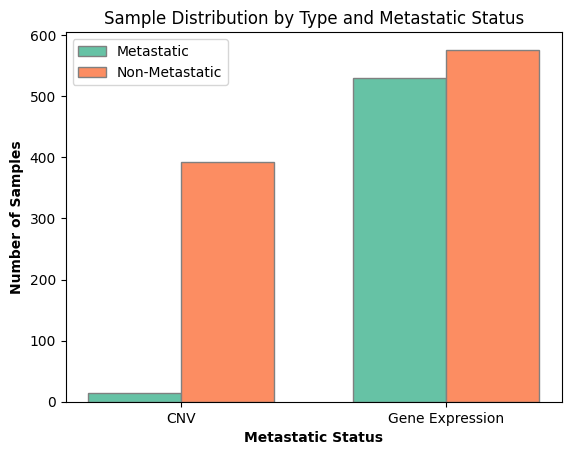

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data (replace with your data)
data = {
    'CNV': [14, 529],
    'Gene Expression': [393, 576]
}

# Metastatic status labels
metastatic_status = ['CNV', 'Gene Expression']

# Select a color palette
colors = sns.color_palette("Set2")

# Create a figure and axis
fig, ax = plt.subplots()

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(metastatic_status))
r2 = [x + bar_width for x in r1]

# Create bars with the selected colors
plt.bar(r1, data['CNV'], color=colors[0], width=bar_width, edgecolor='grey', label='Metastatic')
plt.bar(r2, data['Gene Expression'], color=colors[1], width=bar_width, edgecolor='grey', label='Non-Metastatic')

# Add xticks on the middle of the group bars
plt.xlabel('Metastatic Status', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(metastatic_status))], metastatic_status)

# Add y label
plt.ylabel('Number of Samples', fontweight='bold')

# Create legend and show graphic
plt.legend()
plt.title('Sample Distribution by Type and Metastatic Status')
plt.show()


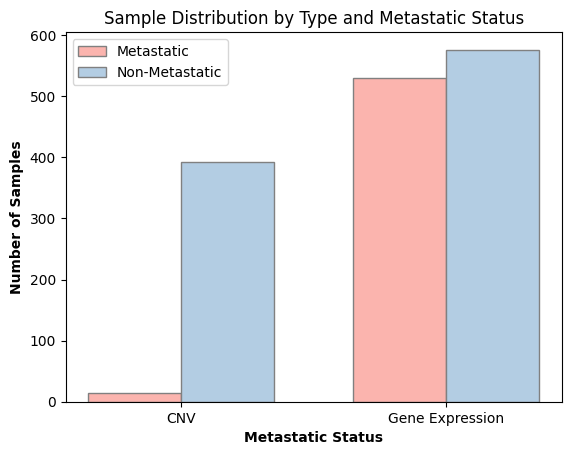

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data (replace with your data)
data = {
    'CNV': [14, 529],
    'Gene Expression': [393, 576]
}

# Metastatic status labels
metastatic_status = ['CNV', 'Gene Expression']

# Select a color palette
colors = sns.color_palette("Pastel1")

# Create a figure and axis
fig, ax = plt.subplots()

# Set width of bar
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(metastatic_status))
r2 = [x + bar_width for x in r1]

# Create bars with the selected colors
plt.bar(r1, data['CNV'], color=colors[0], width=bar_width, edgecolor='grey', label='Metastatic')
plt.bar(r2, data['Gene Expression'], color=colors[1], width=bar_width, edgecolor='grey', label='Non-Metastatic')

# Add xticks on the middle of the group bars
plt.xlabel('Metastatic Status', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(metastatic_status))], metastatic_status)

# Add y label
plt.ylabel('Number of Samples', fontweight='bold')

# Create legend and show graphic
plt.legend()
plt.title('Sample Distribution by Type and Metastatic Status')
plt.show()
